In [10]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd, gzip, json
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [11]:
# load Data
input_file = '../Data/reviews_Cell_Phones_and_Accessories_5.json.gz'
data = []
with gzip.open(input_file) as f:
    for l in f:
        data.append(json.loads(l.strip()))
df = pd.DataFrame.from_dict(data)

# use Analyser to get neg, neu, pos and compound
analyzer = SentimentIntensityAnalyzer()
# TODO: refactor - da muss es eine elegantere Variante geben
# save in a dataframe for all data

In [13]:
df['neg'] = df['reviewText'].apply(lambda review: analyzer.polarity_scores(review)['neg'])

In [14]:
df['neu'] = df['reviewText'].apply(lambda review: analyzer.polarity_scores(review)['neu'])

In [15]:
df['pos'] = df['reviewText'].apply(lambda review: analyzer.polarity_scores(review)['pos'])

In [16]:
df['compound'] = df['reviewText'].apply(lambda review: analyzer.polarity_scores(review)['compound'])

In [19]:
Y = df['overall']
# X = df[['neg', 'neu', 'pos', 'compound']]
X = df[ 'compound']
print(X.head())

0    0.5396
1    0.9403
2    0.8852
3    0.9625
4    0.9020
Name: compound, dtype: float64


In [21]:
# do the data split
list_test = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in list_test:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i,random_state=109) # 70% training and 30% test

    print(f'test size is {i}')
    # use different machinelearning techniques to decide on own rules
    from sklearn.linear_model import LogisticRegression, SGDClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC, NuSVC

    # GaussianNB = GaussianNB()
    # GaussianNB.fit(X_train, y_train)
    # y_pred = GaussianNB.predict(X_test)
    # print("GaussianNB: ")
    # print(confusion_matrix(y_test, y_pred))
    # print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    # print("Precision:", metrics.precision_score(y_test, y_pred, average="macro"))
    # print("F1:", metrics.f1_score(y_test, y_pred, average="macro"))
    array.reshape(-1, 1)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print("Logistic Regression: ")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred, average="macro"))
    print("F1:", metrics.f1_score(y_test, y_pred, average="macro"))

    SGDClassifier = SGDClassifier()
    SGDClassifier.fit(X_train, y_train)
    y_pred = SGDClassifier.predict(X_test)
    print("SGDClassifier: ")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred, average="macro"))
    print("F1:", metrics.f1_score(y_test, y_pred, average="macro"))

    SVC = SVC()
    SVC.fit(X_train, y_train)
    y_pred = SVC.predict(X_test)
    print("SVC: ")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred, average="macro"))
    print("F1:", metrics.f1_score(y_test, y_pred, average="macro"))

    LinearSVC = LinearSVC()
    LinearSVC.fit(X_train, y_train)
    y_pred = LinearSVC.predict(X_test)
    print("LinearSVC: ")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred, average="macro"))
    print("F1:", metrics.f1_score(y_test, y_pred, average="macro"))

# NuSVC = NuSVC()
# NuSVC.fit(X_train, y_train)
# y_pred = NuSVC.predict(X_test)
# print("NuSVC: ")
# print(confusion_matrix(y_test, y_pred))
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:", metrics.precision_score(y_test, y_pred, average="macro"))
# print("F1:", metrics.f1_score(y_test, y_pred, average="macro"))

test size is 0.1


ValueError: Expected 2D array, got 1D array instead:
array=[-0.6959  0.4404  0.802  ... -0.4407 -0.47    0.    ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df1 = df[['neg', 'neu', 'pos', 'compound', 'overall']]
df1.head()

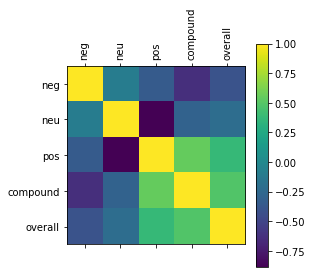

In [57]:
import numpy as np
import matplotlib.pyplot as plt
plt.matshow(df1.corr())
plt.xticks(np.arange(5), df1.columns, rotation=90)
plt.yticks(np.arange(5), df1.columns, rotation=0)
plt.colorbar()
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

Score:  0.5744059864225468
Weights:  [[ 4.65202696  0.22322127 -4.89413527 -0.66709907]
 [ 3.65000157  0.01902042 -3.33248859 -0.30628581]
 [ 1.34086781  0.12278469  0.24960884 -0.0698087 ]
 [-2.07588583 -0.12559426  2.31358297  0.57628538]
 [-7.56701052 -0.23943212  5.66343205  0.46690819]]


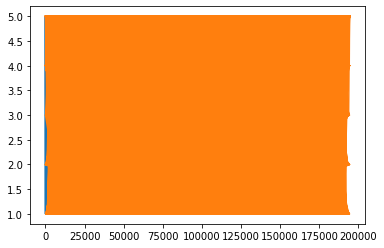

In [60]:
print('Score: ', lr.score(X_test, y_test))
print('Weights: ', lr.coef_)
plt.plot(lr.predict(X_test))
plt.plot(y_test)
plt.show()
# data = {'text': ['I love it', 'It was gross', 'So fantastic']}
# df= pd.DataFrame(data, columns=['text', 'neg', 'neu', 'pos', 'compound'])
# print(df)
# print(analyzer.polarity_scores("I love it"))
# print(analyzer.polarity_scores("It was gross"))
# print(analyzer.polarity_scores("So fantastic"))
# print(vs['neg'])
# print(vs['neu'])
# print(vs['pos'])
# print(vs['compound'])
# Did not work
# df.merge(df.text.apply(lambda review: pd.Series({'neg':analyzer.polarity_scores(review)['neg'],
#                                             'neu':analyzer.polarity_scores(review)['neu'],
#                                             'pos':analyzer.polarity_scores(review)['pos'],
#                                             'compound':analyzer.polarity_scores(review)['compound']})))
# print(df)

In [1]:
corr = df.corr

NameError: name 'df' is not defined